In [ ]:
pip install lifelines


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 8.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=7fb059b62a84b0ae778c10b0a5b9dbaf84bdee1a4c358fadb68d9b2c8aa870de
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
# import packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

#! pip install lifelines
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [ ]:
#import data from drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import data set
df = pd.read_csv("/content/drive/MyDrive/DSBA 6211/heart_attack.csv")

In [ ]:
df.describe()

,id,age,gender,hr,sysbp,diasbp,bmi,cvd,afb,sho,chf,av3,miord,mitype,year,los,dstat,lenfol,fstat
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,250.500000,69.846000,0.400000,87.018000,144.704000,78.266000,26.613780,0.750000,0.156000,0.044000,0.310000,0.02200,0.342000,0.306000,1.984000,6.116000,0.07800,882.436000,0.430000
std,144.481833,14.491456,0.490389,23.586231,32.294865,21.545293,5.405655,0.433446,0.363219,0.205301,0.462956,0.14683,0.474855,0.461291,0.790566,4.714127,0.26844,705.665133,0.495572
min,1.000000,30.000000,0.000000,35.000000,57.000000,6.000000,13.045460,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
25%,125.750000,59.000000,0.000000,69.000000,123.000000,63.000000,23.223775,0.750000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,3.000000,0.00000,296.500000,0.000000
50%,250.500000,72.000000,0.000000,85.000000,141.500000,79.000000,25.945925,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,5.000000,0.00000,631.500000,0.000000
75%,375.250000,82.000000,1.000000,100.250000,164.000000,91.250000,29.391963,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,3.000000,7.000000,0.00000,1363.500000,1.000000
max,500.000000,104.000000,1.000000,186.000000,244.000000,198.000000,44.838860,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,3.000000,47.000000,1.00000,2358.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         500 non-null    int64  
 1   age        500 non-null    int64  
 2   gender     500 non-null    int64  
 3   hr         500 non-null    int64  
 4   sysbp      500 non-null    int64  
 5   diasbp     500 non-null    int64  
 6   bmi        500 non-null    float64
 7   cvd        500 non-null    int64  
 8   afb        500 non-null    int64  
 9   sho        500 non-null    int64  
 10  chf        500 non-null    int64  
 11  av3        500 non-null    int64  
 12  miord      500 non-null    int64  
 13  mitype     500 non-null    int64  
 14  year       500 non-null    int64  
 15  admitdate  500 non-null    object 
 16  disdate    500 non-null    object 
 17  fdate      500 non-null    object 
 18  los        500 non-null    int64  
 19  dstat      500 non-null    int64  
 20  lenfol    

1627.0


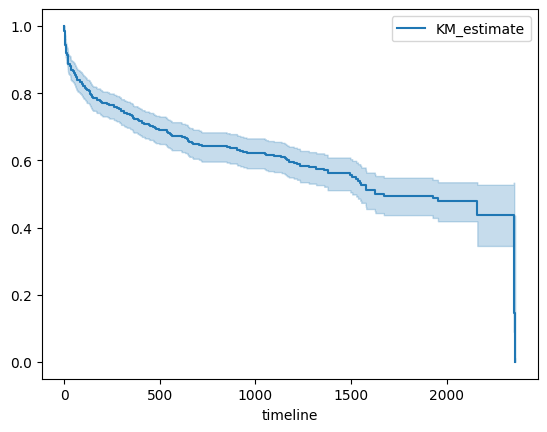

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(durations=df['lenfol'],   # kmf.fit(df['time'], df['event'])
        event_observed = df['fstat'])
kmf.plot_survival_function()

print(kmf.median_survival_time_) # it is the time by which 50% of the population has experienced the event of interest


Text(0.5, 1.0, 'Survival of different gender group')

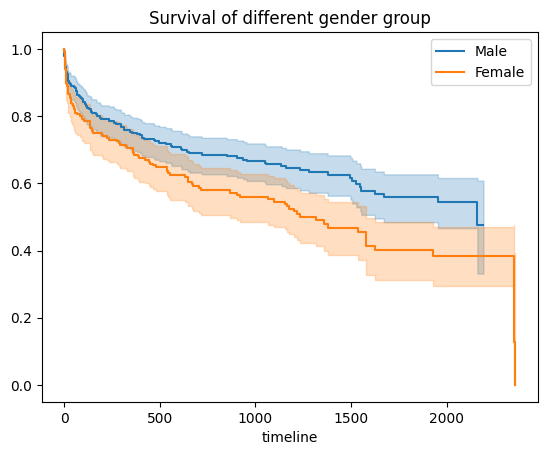

In [ ]:
# Compare survival rate by gender
kmf.fit(durations=df['lenfol'][df['gender']==0],
        event_observed=df['fstat'][df['gender']==0],label='Male')

kmf.plot_survival_function()

kmf.fit(durations=df['lenfol'][df['gender']==1],
        event_observed=df['fstat'][df['gender']==1],label='Female')

kmf.plot_survival_function()

plt.title('Survival of different gender group')


In [ ]:
cph = CoxPHFitter()

df_cox1 = df[['lenfol','fstat','gender']]
cph.fit(df_cox1,duration_col='lenfol',event_col='fstat')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 500 total observations, 285 right-censored observations>
             duration col = 'lenfol'
                event col = 'fstat'
      baseline estimation = breslow
   number of observations = 500
number of events observed = 215
   partial log-likelihood = -1223.52
         time fit was run = 2024-03-25 17:17:40 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
gender      0.38       1.46       0.14             0.11             0.65                 1.12                 1.92

            cmp to    z    p   -log2(p)
covariate                              
gender        0.00 2.77 0.01       7.49
---
Concordance = 0.54
Partial AIC = 2449.04
log-likelihood ratio test = 7.60 on 1 df
-log2(p) of ll-ratio test = 7.42

In [ ]:
# include all the independent variables
df_cox = df[['lenfol','fstat','age','gender','hr',
             'sysbp','diasbp','bmi','cvd','afb',
             'sho','chf','av3','miord','mitype','los']]
df_cox

,lenfol,fstat,age,gender,hr,sysbp,diasbp,bmi,cvd,afb,sho,chf,av3,miord,mitype,los
0,2178,0,83,0,89,152,78,25.54051,1,1,0,0,0,1,0,5
1,2172,0,49,0,84,120,60,24.02398,1,0,0,0,0,0,1,5
2,2190,0,70,1,83,147,88,22.14290,0,0,0,0,0,0,1,5
3,297,1,70,0,65,123,76,26.63187,1,0,0,1,0,0,1,10
4,2131,0,70,0,63,135,85,24.41255,1,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10,1,76,1,68,112,88,27.96454,1,1,0,0,0,0,1,1
496,662,0,76,1,88,208,96,24.26862,1,0,0,0,0,0,0,3
497,725,0,57,1,123,120,74,42.13576,1,1,0,0,0,0,0,3
498,532,0,67,0,59,112,62,27.40905,1,0,0,0,0,0,1,1


In [ ]:
cph.fit(df_cox, duration_col='lenfol',event_col='fstat')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 500 total observations, 285 right-censored observations>
             duration col = 'lenfol'
                event col = 'fstat'
      baseline estimation = breslow
   number of observations = 500
number of events observed = 215
   partial log-likelihood = -1114.58
         time fit was run = 2024-03-25 17:17:49 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.05       1.05       0.01             0.03             0.06                 1.03                 1.06
gender     -0.29       0.75       0.14            -0.58            -0.01                 0.56                 0.99
hr          0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
sysbp       0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
diasbp     -0.01       0.99       0.00            -0.02            -0.00                 0.98                 1.00
bmi        -0.05       0.95       0.02            -0.08            -0.01                 0.92                 0.99
cvd        -0.06       0.95       0.18            -0.41             0.30                 0.67                 1.34
afb         0.04       1.04       0.18            -0.32             0.39                 0.73                 1.48
sho         1.24       3.45       0.29             0.67             1.81                 1.96                 6.09
chf         0.73       2.08       0.15             0.43             1.03                 1.54                 2.81
av3         0.31       1.37       0.43            -0.53             1.16                 0.59                 3.18
miord       0.08       1.09       0.15            -0.21             0.38                 0.81                 1.46
mitype     -0.24       0.79       0.19            -0.62             0.14                 0.54                 1.15
los        -0.01       0.99       0.02            -0.04             0.02                 0.96                 1.02

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  6.84 <0.005      36.90
gender        0.00 -2.03   0.04       4.55
hr            0.00  3.89 <0.005      13.30
sysbp         0.00  0.52   0.60       0.73
diasbp        0.00 -2.55   0.01       6.54
bmi           0.00 -2.84 <0.005       7.80
cvd           0.00 -0.31   0.76       0.40
afb           0.00  0.20   0.84       0.25
sho           0.00  4.28 <0.005      15.74
chf           0.00  4.81 <0.005      19.33
av3           0.00  0.73   0.47       1.10
miord         0.00  0.56   0.58       0.80
mitype        0.00 -1.23   0.22       2.20
los           0.00 -0.46   0.65       0.63
---
Concordance = 0.78
Partial AIC = 2257.16
log-likelihood ratio test = 225.48 on 14 df
-log2(p) of ll-ratio test = 131.16